# Chapter 16: Binary Logistic Regression

Until now, we’ve used an output layer that is a probability distribution, where all of the values represent a confidence level of a given class being the correct class, and where these confidences sum to 1.

In this chapter, we consider an alternative output layer option, where each neuron separately represents two classes — 0 for one of the classes, and a 1 for the other.

A model with this type of output layer is called <b>binary logistic regression</b>.

Binary logistic regression use a sigmoid activation function for the output layer rather than softmax, and binary cross-entropy rather than categorical cross-entropy for calculating loss.

## 16.1. Sigmoid Activation Function

The sigmoid activation function “squishes” a range of outputs from negative infinity to positive infinity to be between 0 and 1. The bounds represent the two possible classes. The sigmoid equation is:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

For the purpose of neural networks, we’ll use our common notation:

$$
\sigma_{i, \ j} = \frac{1}{1 + e^{-z_{i, \ j}}}
$$

$z$ is a singular output value of the layer that this activation function takes as input. The index $i$ means the current sample, and the index $j$ means the current output in this sample.

<center><img src='./image/16-1.png' style='width: 60%'/><font color='gray'><i>The sigmoid function graph.</i></font></center>

The sigmoid function approaches both maximum and minimum values exponentially fast. For example, for an input of 2 , the output is 0.88, which is already pretty close to 1 . With an input of 3 , the output is 0.95, and so on. It’s also similar for negative values: $σ(-2) ≈ 0.12$ and $σ(-3) ≈ 0.05$. This property makes the sigmoid activation function a good candidate to apply to the final layer’s output with a binary logistic regression model.

## 16.2. Sigmoid Function Derivative

Let’s define the derivative of the Sigmoid function with respect to its input:

$$
\begin{align}
\sigma_{i, \ j} = \frac{1}{1 + e^{-z_{i, \ j}}} \quad \to \quad \sigma'_{i, \ j} & =\frac{d}{d z_{i, j} } \Big[ \frac{1}{1 + e^{-z_{i, \ j}}} \Big] \\
& = \frac{d}{d z_{i, j} } (  1 + e^{-z_{i, \ j}}  )^{-1} \\
& = -1 \cdot (  1 + e^{-z_{i, \ j}}  )^{-1-1} \cdot \frac{d}{d z_{i, j} } (  1 + e^{-z_{i, \ j}}  ) \\
& = - (  1 + e^{-z_{i, \ j}}  )^{-2} \cdot  (  \frac{d}{d z_{i, j} } 1 + \frac{d}{d z_{i, \ j} } e^{-z_{i, \ j}}  ) \\
& = - (  1 + e^{-z_{i, \ j}}  )^{-2} \cdot  \Big( 0 +  e^{-z_{i, \ j}} \cdot \frac{d}{d z_{i,\ j} } \big[  -z_{i, \ j}  \big]  \Big) \\
& = - (  1 + e^{-z_{i, \ j}}  )^{-2} \cdot  \Big( e^{-z_{i, \ j}} \cdot \big( -1 \cdot \frac{d}{d z_{i,\ j} }z_{i, \ j}  \big)  \Big) = - (  1 + e^{-z_{i, \ j}}  )^{-2} \cdot  \Big( e^{-z_{i, \ j}} \cdot \big( -1 \big)  \Big) \\
& = - (  1 + e^{-z_{i, \ j}}  )^{-2} \cdot  \Big( - e^{-z_{i, \ j}}   \Big)  =  (  1 + e^{-z_{i, \ j}}  )^{-2} \cdot e^{-z_{i, \ j}} \\
& = \frac{ e^{-z_{i, \ j}}   }{ (  1 + e^{-z_{i, \ j}}  )^2 } \\
& = \frac{ e^{-z_{i, \ j}} }{ (  1 + e^{-z_{i, \ j}} )  (  1 + e^{-z_{i, \ j}} )  } \\
& = \frac{ 1 }{ 1 + e^{-z_{i, \ j}} } \cdot\frac{ e^{-z_{i, \ j}} }{ 1 + e^{-z_{i, \ j}} } \\
& = \frac{ 1 }{ 1 + e^{-z_{i, \ j}} } \cdot \frac{ 1 + e^{-z_{i, \ j}} -1 }{ 1 + e^{-z_{i, \ j}} } \\
& = \frac{ 1 }{ 1 + e^{-z_{i, \ j}} } \cdot \Big( \frac{ 1 + e^{-z_{i, \ j}} }{ 1 + e^{-z_{i, \ j}} } - \frac{ 1 }{ 1 + e^{-z_{i, \ j}} } \Big) \\
& = \frac{ 1 }{ 1 + e^{-z_{i, \ j}} } \cdot \Big( 1 - \frac{ 1 }{ 1 + e^{-z_{i, \ j}} } \Big) = \sigma_{i, \ j} \cdot ( 1 - \sigma_{i, \ j}) \
\end{align}
$$

It turns out that the derivative of the sigmoid function equals this function multiplied by the difference of 1 and this function as well. That allows us to easily write this derivative in the code.

## 16.3. Binary Cross-Entropy Loss

To calculate binary cross-entropy loss, we will continue to use the negative log concept from categorical cross-entropy loss.

$$
\begin{align}
L_{i, \ j} & = \big(  y_{i, \ j} \big) \big(  -\text{log} ( \hat{y}_{i, \ j} ) \big) + \big(  1 -  y_{i, \ j}  \big) \big(  -\text{log} ( 1 - \hat{y}_{i, \ j} )  \big) \\
& = -  y_{i, \ j} \cdot \text{log} ( \hat{y}_{i, \ j} ) - \big(  1 -  y_{i, \ j}  \big) \cdot \text{log} ( 1 - \hat{y}_{i, \ j} ) \
\end{align}
$$

Since a model can contain multiple binary outputs, and each of them, unlike in the cross-entropy loss, outputs its own prediction, loss calculated on a single output is going to be a vector of losses containing one value for each output.

What we need is a sample loss, we need to calculate a mean of all of these losses from a single sample:

$$
L_i = \frac{1}{J} \sum_j L_{i, \ j}
$$

The index $i$ means the current sample, the index $j$ means the current output in this sample, and the $J$ means the number of outputs.

## 16.4. Binary Cross-Entropy Loss Derivative

To calculate the partial derivative of this loss function with respect to the predicted input, we’ll use the latter version of the loss equation.

$$
\begin{align}
\frac{∂ L_{i, \ j} }{∂ \hat{y}_{i, \ j} } & =  \frac{∂ }{∂ \hat{y}_{i, \ j} } \Big[ -  y_{i, \ j} \cdot \text{log} ( \hat{y}_{i, \ j} ) - \big(  1 -  y_{i, \ j}  \big) \cdot \text{log} ( 1 - \hat{y}_{i, \ j} ) \Big]  \\
& = \frac{∂ }{∂ \hat{y}_{i, \ j} } \Big[ -  y_{i, \ j} \cdot \text{log} ( \hat{y}_{i, \ j} ) \Big]  + \frac{∂ }{∂ \hat{y}_{i, \ j} } \Big[  - \big(  1 -  y_{i, \ j}  \big) \cdot \text{log} ( 1 - \hat{y}_{i, \ j} ) \Big]  \\
& =  -  y_{i, \ j} \cdot \frac{∂ }{∂ \hat{y}_{i, \ j} }  \text{log} ( \hat{y}_{i, \ j} ) - \big(  1 -  y_{i, \ j}  \big) \cdot \frac{∂ }{∂ \hat{y}_{i, \ j} } \text{log} ( 1 - \hat{y}_{i, \ j} )  \\
& = -  y_{i, \ j} \cdot \frac{ 1 }{ \hat{y}_{i, \ j} } \cdot \frac{∂ }{∂ \hat{y}_{i, \ j} }  \hat{y}_{i, \ j}  - \big(  1 -  y_{i, \ j}  \big) \cdot \frac{ 1 }{ 1 - \hat{y}_{i, \ j}  } \cdot \frac{∂ }{∂ \hat{y}_{i, \ j} } \Big[ 1 - \hat{y}_{i, \ j}  \Big]  \\
& = -  y_{i, \ j} \cdot \frac{ 1 }{ \hat{y}_{i, \ j} } \cdot 1 - \big(  1 -  y_{i, \ j}  \big) \cdot \frac{ 1 }{ 1 - \hat{y}_{i, \ j}  } \cdot \big( \frac{∂ }{∂ \hat{y}_{i, \ j} }  1 - \frac{∂ }{∂ \hat{y}_{i, \ j} } \hat{y}_{i, \ j}  \big)  \\
& = -  y_{i, \ j} \cdot \frac{ 1 }{ \hat{y}_{i, \ j} } \cdot 1 - \big(  1 -  y_{i, \ j}  \big) \cdot \frac{ 1 }{ 1 - \hat{y}_{i, \ j}  } \cdot \big( 0 - 1 \big) \\
& = -   \frac{ y_{i, \ j} }{ \hat{y}_{i, \ j} } + \frac{ 1 -  y_{i, \ j} }{ 1 - \hat{y}_{i, \ j} }  =  - \Big(  \frac{ y_{i, \ j} }{ \hat{y}_{i, \ j} } - \frac{ 1 -  y_{i, \ j} }{ 1 - \hat{y}_{i, \ j} } \Big) \
\end{align}
$$

This partial derivative is a derivative of the single output’s loss and, with any type of output, we always need to calculate it with respect to a sample loss, not an atomic output loss, since we have to calculate the mean value of all output losses in a sample to form a sample loss during the forward pass:

$$
L_i = \frac{1}{J} \sum_j L_{i, \ j}
$$

For backpropagation, we have to calculate the partial derivative of the sample loss with respect to each input:

$$
\frac{∂ L_i }{∂ L_{i, \ j}  }   =  \frac{∂ }{∂ L_{i, \ j} } \big[ \frac{1}{J} \sum_j L_{i, \ j}  \big] = \frac{1}{J}  \cdot \frac{∂ }{∂ L_{i, \ j} } L_{i, \ j}  = \frac{1}{J}  \cdot 1 = \frac{1}{J}
$$

Now, we can update the equation of the partial derivative of a sample loss with respect to a single output loss by applying the chain rule:

$$
\frac{∂ L_i}{∂ \hat{y}_{i, \ j} } = \frac{∂ L_i }{∂ L_{i, \ j} }  \cdot \frac{L_{i, \ j}  }{∂ \hat{y}_{i, \ j} } 
=  \frac{1}{J}  \cdot \Big( - \big(  \frac{ y_{i, \ j} }{ \hat{y}_{i, \ j} } - \frac{ 1 - y_{i, \ j} }{ 1 - \hat{y}_{i, \ j} } \big) \Big) 
= - \frac{1}{J} \cdot \big( \frac{ y_{i, \ j} }{ \hat{y}_{i, \ j} } - \frac{ 1 - y_{i, \ j} }{ 1 - \hat{y}_{i, \ j} } \big)
$$

We have to perform this normalization since each output returns its own derivative, and without normalization, each additional input will raise gradients and require changing other hyperparameters, including the learning rate.



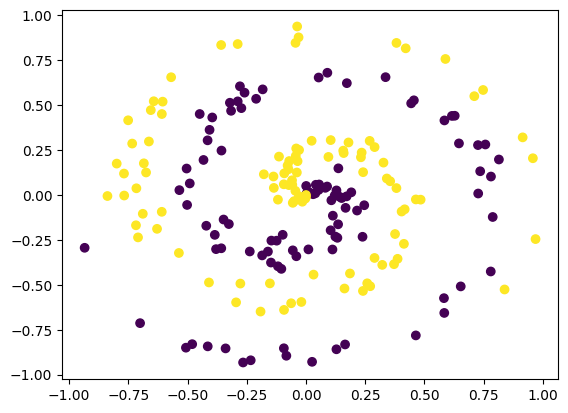

epoch: 0, acc: 0.500, loss: 0.693 (data_loss: 0.693, reg_loss: 0.000), lr: 0.001
epoch: 100, acc: 0.630, loss: 0.674 (data_loss: 0.673, reg_loss: 0.001), lr: 0.0009999505024501287
epoch: 200, acc: 0.625, loss: 0.669 (data_loss: 0.668, reg_loss: 0.001), lr: 0.0009999005098992651
epoch: 300, acc: 0.645, loss: 0.665 (data_loss: 0.663, reg_loss: 0.002), lr: 0.000999850522346909
epoch: 400, acc: 0.650, loss: 0.659 (data_loss: 0.657, reg_loss: 0.002), lr: 0.0009998005397923115
epoch: 500, acc: 0.675, loss: 0.648 (data_loss: 0.644, reg_loss: 0.004), lr: 0.0009997505622347225
epoch: 600, acc: 0.720, loss: 0.632 (data_loss: 0.626, reg_loss: 0.006), lr: 0.0009997005896733929
epoch: 700, acc: 0.770, loss: 0.614 (data_loss: 0.604, reg_loss: 0.010), lr: 0.0009996506221075735
epoch: 800, acc: 0.775, loss: 0.594 (data_loss: 0.579, reg_loss: 0.015), lr: 0.000999600659536515
epoch: 900, acc: 0.775, loss: 0.575 (data_loss: 0.556, reg_loss: 0.020), lr: 0.0009995507019594694
epoch: 1000, acc: 0.785, loss:

epoch: 8500, acc: 0.940, loss: 0.276 (data_loss: 0.216, reg_loss: 0.060), lr: 0.0009957684818364362
epoch: 8600, acc: 0.940, loss: 0.275 (data_loss: 0.215, reg_loss: 0.059), lr: 0.0009957189065612402
epoch: 8700, acc: 0.945, loss: 0.273 (data_loss: 0.214, reg_loss: 0.059), lr: 0.000995669336222102
epoch: 8800, acc: 0.945, loss: 0.272 (data_loss: 0.213, reg_loss: 0.059), lr: 0.000995619770818285
epoch: 8900, acc: 0.945, loss: 0.271 (data_loss: 0.212, reg_loss: 0.059), lr: 0.0009955702103490519
epoch: 9000, acc: 0.945, loss: 0.270 (data_loss: 0.211, reg_loss: 0.059), lr: 0.000995520654813666
epoch: 9100, acc: 0.945, loss: 0.269 (data_loss: 0.210, reg_loss: 0.059), lr: 0.0009954711042113903
epoch: 9200, acc: 0.945, loss: 0.268 (data_loss: 0.210, reg_loss: 0.058), lr: 0.0009954215585414883
epoch: 9300, acc: 0.945, loss: 0.267 (data_loss: 0.209, reg_loss: 0.058), lr: 0.000995372017803224
epoch: 9400, acc: 0.945, loss: 0.266 (data_loss: 0.208, reg_loss: 0.058), lr: 0.0009953224819958604
epoc

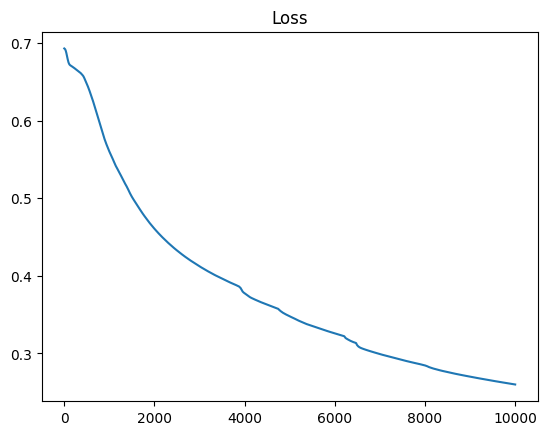

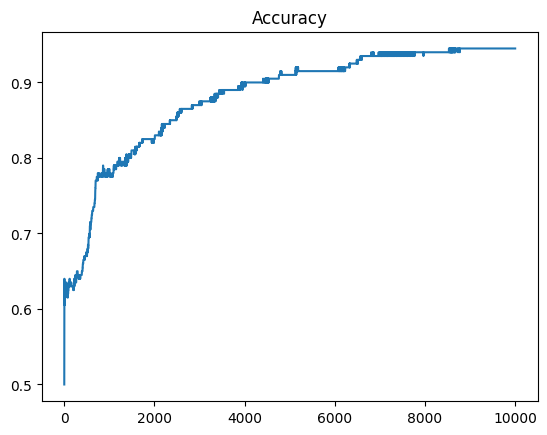

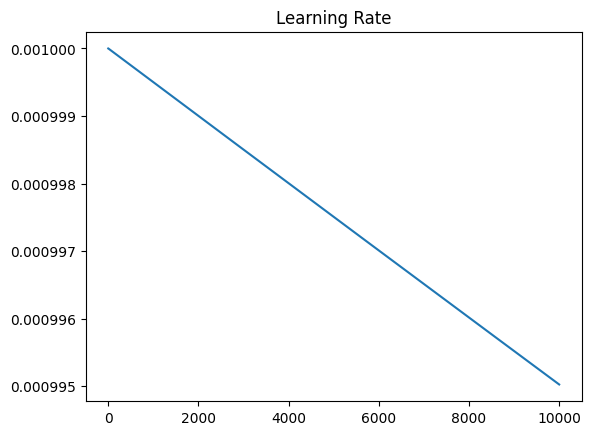

validation, acc: 0.920, loss: 0.237


In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * \
                             self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * \
                            self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# Dropout
class Layer_Dropout:

    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate,
                           size=inputs.shape) / self.rate
        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)

            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Sigmoid activation
class Activation_Sigmoid:

    # Forward pass
    def forward(self, inputs):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output


# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))


    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
                self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = \
                self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
                             layer.dweights
            bias_updates = -self.current_learning_rate * \
                           layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1



# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1



# RMSprop optimizer
class Optimizer_RMSprop:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + \
            (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
            (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1



# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Common loss class
class Loss:

    # Regularization loss calculation
    def regularization_loss(self, layer):

        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * \
                                   np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * \
                                   np.sum(layer.weights *
                                          layer.weights)

        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * \
                                   np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * \
                                   np.sum(layer.biases *
                                          layer.biases)

        return regularization_loss

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)


        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples
# Create dataset
X, y = spiral_data(samples=100, classes=2)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Reshape labels to be a list of lists
# Inner list contains one output (either 0 or 1)
# per each output neuron, 1 in this case
y = y.reshape(-1, 1)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
                            bias_regularizer_l2=5e-4)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 1 output value
dense2 = Layer_Dense(64, 1)

# Create Sigmoid activation:
activation2 = Activation_Sigmoid()

# Create loss function
loss_function = Loss_BinaryCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(decay=5e-7)

losses = []
accuracies = []
learning_rates = []

# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function
    # of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through activation function
    # takes the output of second dense layer here
    activation2.forward(dense2.output)

    # Calculate the data loss
    data_loss = loss_function.calculate(activation2.output, y)
    # Calculate regularization penalty
    regularization_loss = \
        loss_function.regularization_loss(dense1) + \
        loss_function.regularization_loss(dense2)

    # Calculate overall loss
    loss = data_loss + regularization_loss
    losses.append(loss)

    # Calculate accuracy from output of activation2 and targets
    # Part in the brackets returns a binary mask - array consisting
    # of True/False values, multiplying it by 1 changes it into array
    # of 1s and 0s
    predictions = (activation2.output > 0.5) * 1
    accuracy = np.mean(predictions==y)
    accuracies.append(accuracy)
    
    learning_rates.append(optimizer.current_learning_rate)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, '+
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()
plt.plot(range(10001), learning_rates)
plt.title('Learning Rate')
plt.show()
    
# Validate the model

# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=2)

# Reshape labels to be a list of lists
# Inner list contains one output (either 0 or 1)
# per each output neuron, 1 in this case
y_test = y_test.reshape(-1, 1)


# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# takes the output of second dense layer here
activation2.forward(dense2.output)

# Calculate the data loss
loss = loss_function.calculate(activation2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# Part in the brackets returns a binary mask - array consisting of
# True/False values, multiplying it by 1 changes it into array
# of 1s and 0s
predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions==y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')
